<a href="https://colab.research.google.com/github/Iman-Kalyan-Majumder/Diabetes-Prediction/blob/main/Diabetes.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

In [3]:
data=pd.read_csv("diabetes.csv")

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


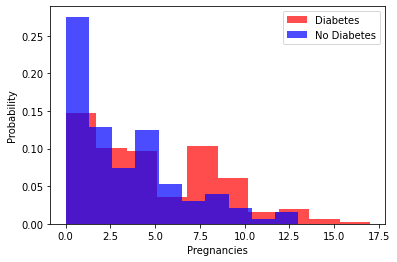

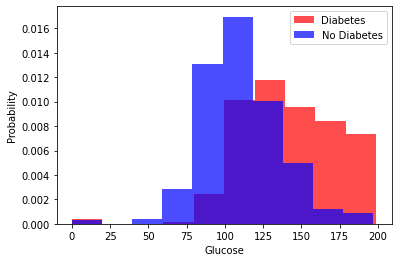

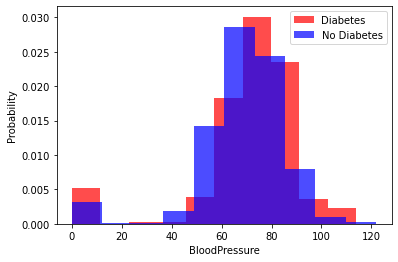

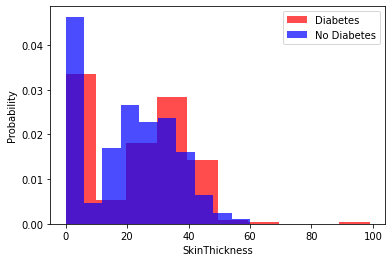

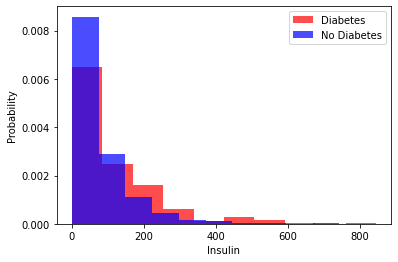

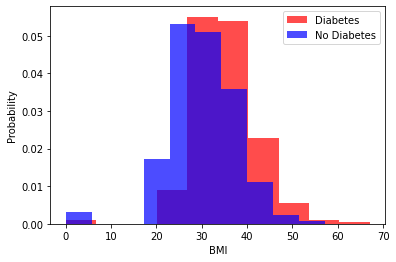

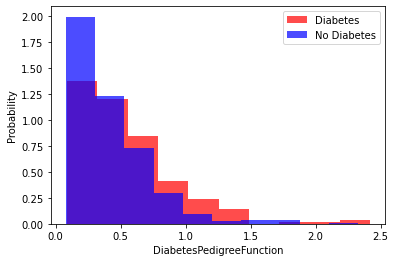

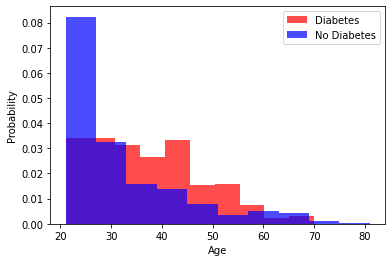

In [6]:
for label in data.columns[:-1]:
  plt.hist(data[data['Outcome']==1][label], density=True, color="red", alpha=0.7, label="Diabetes")
  plt.hist(data[data['Outcome']==0][label], density=True, color="blue", alpha=0.7, label="No Diabetes")
  plt.legend()
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.show()

In [15]:
def scale_dataset(data, oversample=False):
  scaler=StandardScaler()
  X=data[data.columns[:-1]].values
  X=scaler.fit_transform(X)
  y=data[data.columns[-1]].values

  if oversample:
    over=RandomOverSampler()
    X,y=over.fit_resample(X,y)
  
  temp_data=np.hstack((X,np.reshape(y,(-1,1))))
  data=pd.DataFrame(temp_data,columns=data.columns)

  return data, X, y

In [10]:
train,test=np.split(data.sample(frac=1),[int(0.9*len(data))])

In [11]:
len(train),len(test)

(691, 77)

In [85]:
train, X_train, y_train = scale_dataset(train,oversample=True)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [86]:
len(train[train['Outcome']==1]),len(train[train['Outcome']==0])

(449, 449)

# Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier

In [88]:
model=RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [89]:
y_pred=model.predict(X_test)

In [90]:
from sklearn.metrics import classification_report

In [91]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.88      0.86      0.87        51
         1.0       0.74      0.77      0.75        26

    accuracy                           0.83        77
   macro avg       0.81      0.82      0.81        77
weighted avg       0.83      0.83      0.83        77



Accuracy of 83%

# K Nearest Neighbors

In [92]:
from sklearn.neighbors import KNeighborsClassifier

In [93]:
knn_model=KNeighborsClassifier(n_neighbors=7)

In [94]:
knn_model.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=7)

In [95]:
y_pred=knn_model.predict(X_test)

In [96]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.71      0.80        51
         1.0       0.61      0.88      0.72        26

    accuracy                           0.77        77
   macro avg       0.76      0.80      0.76        77
weighted avg       0.82      0.77      0.77        77



Accuracy of 77%

# Support Vector Machine

In [97]:
from sklearn.svm import SVC

In [102]:
svc_model=SVC()

In [103]:
svc_model.fit(X_train,y_train)

SVC()

In [104]:
y_pred=svc_model.predict(X_test)

In [105]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

         0.0       0.69      0.92      0.79        38
         1.0       0.88      0.59      0.71        39

    accuracy                           0.75        77
   macro avg       0.79      0.76      0.75        77
weighted avg       0.79      0.75      0.75        77



Accuracy of 75%

## Deep Neural Network

In [390]:
import tensorflow as tf

In [398]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dropout(rate=0.15),
    tf.keras.layers.Dense(16,activation="relu"),
    tf.keras.layers.Dense(1,activation="sigmoid")
])

In [431]:
early_stopping=tf.keras.callbacks.EarlyStopping(
    min_delta=0.001,
    patience=50,
    restore_best_weights=True
)

In [432]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    loss=tf.keras.losses.BinaryCrossentropy(),
    metrics=["Accuracy"]
)

In [444]:
train,valid,test=np.split(data.sample(frac=1),[int(0.8*len(data)),int(0.9*len(data))])
train, X_train, y_train = scale_dataset(train,oversample=True)
valid, X_valid, y_valid = scale_dataset(valid, oversample=False)
test, X_test, y_test = scale_dataset(test, oversample=False)

In [445]:
history=model.fit(
    X_train,
    y_train,
    batch_size=50,
    epochs=200,
    callbacks=[early_stopping],
    validation_data=(X_valid,y_valid)
)

Epoch 1/200
16/16 [==============================] - 0s 6ms/step - loss: 0.4880 - Accuracy: 0.7645 - val_loss: 0.4586 - val_Accuracy: 0.7792
Epoch 2/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4802 - Accuracy: 0.7657 - val_loss: 0.4567 - val_Accuracy: 0.7792
Epoch 3/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4757 - Accuracy: 0.7670 - val_loss: 0.4633 - val_Accuracy: 0.7662
Epoch 4/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4780 - Accuracy: 0.7758 - val_loss: 0.4609 - val_Accuracy: 0.7662
Epoch 5/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4654 - Accuracy: 0.7758 - val_loss: 0.4579 - val_Accuracy: 0.7922
Epoch 6/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4610 - Accuracy: 0.7720 - val_loss: 0.4611 - val_Accuracy: 0.7922
Epoch 7/200
16/16 [==============================] - 0s 4ms/step - loss: 0.4736 - Accuracy: 0.7909 - val_loss: 0.4588 - val_Accuracy: 0.7922
Epoch 8/200
1

In [446]:
model.evaluate(X_test,y_test)

3/3 [==============================] - 0s 4ms/step - loss: 0.3883 - Accuracy: 0.7792


[0.3883114457130432, 0.7792207598686218]

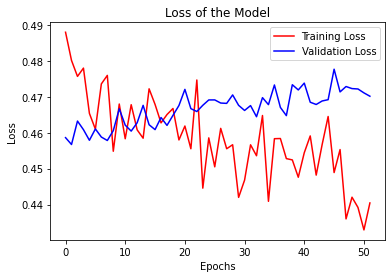

In [447]:
plt.plot(history.history['loss'], label="Training Loss", color="red")
plt.plot(history.history['val_loss'], label="Validation Loss", color="blue")
plt.title("Loss of the Model")
plt.legend()
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()

Accuracy of around 78%